In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def print_top(lst,num):
     #Print the top num items of lst in decreasing order
        s=sorted(lst,key=lambda item: -lst[item])
        print("\tValue\tNode")
        for i in range(0,min(num,len(s))):
             print("{0}\t{1}\t{2}".format(i+1,lst[s[i]],s[i]))
                
def new_list(lst,num):
    s=sorted(lst,key=lambda item: -lst[item])
    newlst = []
    for i in range(0,min(num,len(s))):
        newlst.append(s[i])
#     print(newlst)
    return(newlst)

def sort_list(filename,mylist,num):
    s=sorted(mylist,key=lambda item: -mylist[item])
    with open(filename, 'w') as f:
        for i in range(0,min(num,len(s))):
            print("{0}\t{1}\t{2}".format(i+1,mylist[s[i]],s[i]), file = f) 
            
def make_list(lst,filename):
    s=list(dict.items(lst))
    with open(filename, 'w') as f:
        for i in range(0,len(s)):
            t=s[i][0]
            fst=t[4:]
            print("{0}\t{1}".format(fst,s[i][1]), file = f) 
            
def sort_list2(mylist,filename):
    s=sorted(mylist,key=lambda item: -mylist[item])
    with open(filename, 'w') as f:
        for i in range(0,len(s)):
            print("{0}\t{1}".format(s[i],mylist[s[i]]), file = f) 
            

In [4]:
graph="mCAR.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
betw_centr=nx.betweenness_centrality(g, k=None, normalized=True)
sort_list2(betw_centr,'betw_mCAR')
##################################################################

graph="mTCP.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
betw_centr=nx.betweenness_centrality(g, k=None, normalized=True)
sort_list2(betw_centr,'betw_mTCP')
###################################################################

graph="hCIT.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
betw_centr=nx.betweenness_centrality(g, k=None, normalized=True)
sort_list2(betw_centr,'betw_hCIT')
###################################################################

graph="000.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
betw_centr=nx.betweenness_centrality(g, k=None, normalized=True)
sort_list2(betw_centr,'betw_000')
###################################################################

graph="0T0.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
betw_centr=nx.betweenness_centrality(g, k=None, normalized=True)
sort_list2(betw_centr,'betw_0T0')
###################################################################

graph="AT0.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
betw_centr=nx.betweenness_centrality(g, k=None, normalized=True)
sort_list2(betw_centr,'betw_AT0')
####################################################################

graph="dAT0.adj_list"
g=nx.read_adjlist(graph,create_using=nx.Graph(),nodetype=str)
betw_centr=nx.betweenness_centrality(g, k=None, normalized=True)
sort_list2(betw_centr,'betw_dAT0')

In [5]:
%%bash

# Make a second mCAR closeness file for comparison with hCAR

cp betw_mCAR temp
cut -f1 temp > temp2 
sed -e 's/^.*_//g' temp2 > temp3
awk '{print $1+106}' temp3 > temp4
sed -e 's/[0-9]\+//g' temp2 > temp3
paste temp3 temp4 | sed 's/\t//g' > temp5
paste temp temp5 | awk '{print $3"\t"$2}' > betw_mCAR2
rm temp*

In [6]:
# %%bash
# awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' betw_mTCP betw_mCAR > temp
# cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
# paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_betw_mCAR_mTCP 

In [61]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' betw_mTCP betw_mCAR > scatter_betw_mCAR_mTCP2

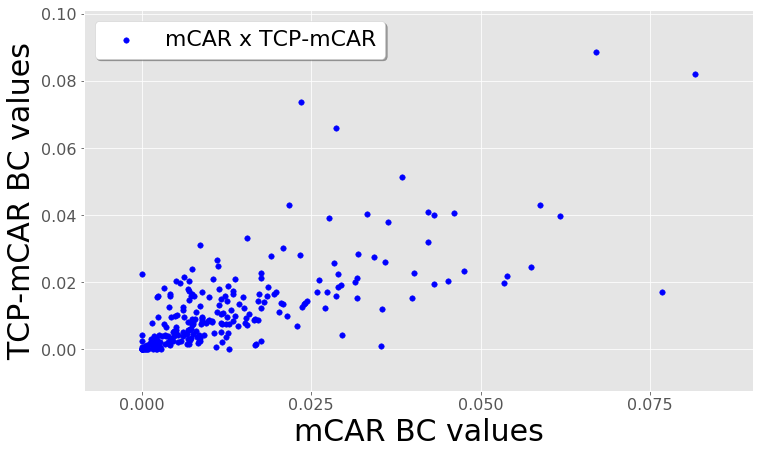

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df1=pd.read_csv('scatter_betw_mCAR_mTCP2',sep='\t',header=None)
plt.scatter(df1[1], df1[2],color='blue',edgecolor='blue',zorder=3,s=30,label="mCAR x TCP-mCAR")

# plt.plot(np.unique(df1[1]), np.poly1d(np.polyfit(df1[1], df1[2], 1))(np.unique(df1[1])),alpha=0.5,color="red")
# plt.axvline(df1.iloc[40,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=22)
plt.xlabel('mCAR BC values',fontsize=30,color='black',labelpad=5)
plt.ylabel('TCP-mCAR BC values',fontsize=30,color='black',labelpad=5)

plt.xlim(-0.015,0.1)
plt.xticks(np.arange(0.00, 0.0755, 0.025))
plt.yticks(np.arange(0.00, 0.12, 0.02))


plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
# plt.text(0.027,0.058,'16%% cutoff=%.4f' %(df1.iloc[40,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('CAR_Betweenness_scatterplot.png')
plt.show()

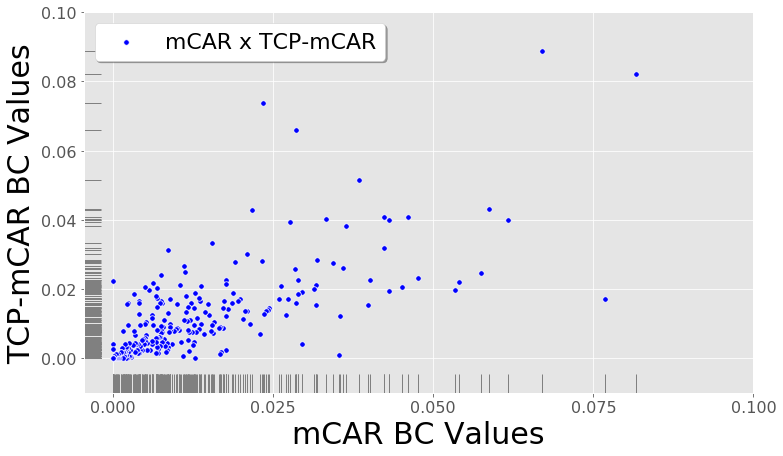

In [270]:
f, ax = plt.subplots(figsize=(12, 7))
df1=pd.read_csv('scatter_betw_mCAR_mTCP2',sep='\t',header=None)
sns.scatterplot(df1[1], df1[2], ax=ax, color="blue",s=30,label="mCAR x TCP-mCAR")
sns.rugplot(df1[1], color="gray", axis='x')
sns.rugplot(df1[2], color="gray", axis='y', height=0.025);

plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=22)
plt.xlabel('mCAR BC Values',fontsize=30,color='black',labelpad=5)
plt.ylabel('TCP-mCAR BC Values',fontsize=30,color='black',labelpad=5)

plt.xticks(np.arange(0.00, 0.11, 0.025))
plt.yticks(np.arange(0.00, 0.11, 0.02))
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.savefig('CAR_Betweenness_scatterplot.png')
plt.show()

In [ ]:
 g = (sns.jointplot("sepal_length", "sepal_width",
...                    data=iris, color="k")
...         .plot_joint(sns.kdeplot, zorder=0, n_levels=6))

In [17]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' betw_hCIT betw_mCAR2 > temp
cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_betw_mCAR_hCIT 

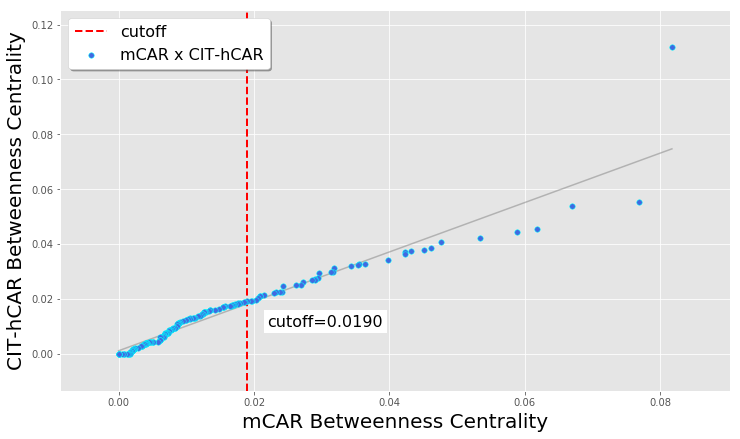

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df1=pd.read_csv('scatter_betw_mCAR_hCIT',sep='\t',header=None)
plt.scatter(df1[1], df1[3],color='royalblue',edgecolor='cyan',zorder=3,s=30,label="mCAR x CIT-hCAR")

plt.plot(np.unique(df1[1]), np.poly1d(np.polyfit(df1[1], df1[3], 1))(np.unique(df1[1])),alpha=0.5,color="gray")
plt.axvline(df1.iloc[40,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=16)
plt.xlabel('mCAR Betweenness Centrality',fontsize=20,color='black',labelpad=5)
plt.ylabel('CIT-hCAR Betweenness Centrality',fontsize=20,color='black',labelpad=5)
plt.text(0.022,0.01,'cutoff=%.4f' %(df1.iloc[40,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('mCAR-hCAR__Betweenness_scatterplot.png')
plt.show()

In [21]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' betw_000 betw_0T0 > temp
cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_betw_000_0T0 

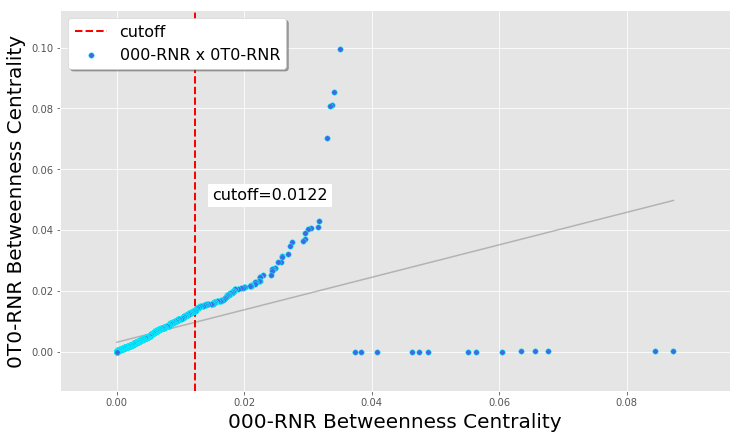

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df=pd.read_csv('scatter_betw_000_0T0',sep='\t',header=None)
plt.scatter(df[1], df[3],color='royalblue',edgecolor='cyan',zorder=3,s=30,label="000-RNR x 0T0-RNR")

df.drop(df.tail(7).index,inplace=True)
plt.plot(np.unique(df[1]), np.poly1d(np.polyfit(df[1], df[3], 1))(np.unique(df[1])),alpha=0.5,color="gray")

plt.axvline(df.iloc[120,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=16)
plt.xlabel('000-RNR Betweenness Centrality',fontsize=20,color='black',labelpad=5)
plt.ylabel('0T0-RNR Betweenness Centrality',fontsize=20,color='black',labelpad=5)
plt.text(0.015,0.05,'cutoff=%.4f' %(df.iloc[120,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('000-0T0_Betweenness_scatterplot.png')
plt.show()

In [31]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' betw_000 betw_AT0 > temp
cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_betw_000_AT0 

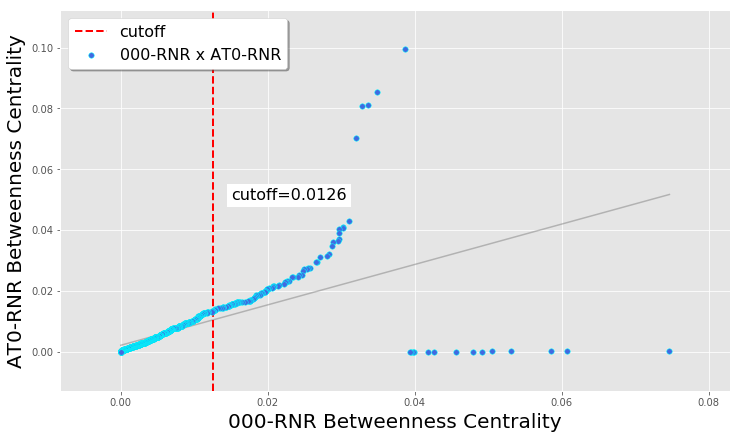

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df=pd.read_csv('scatter_betw_000_AT0',sep='\t',header=None)
plt.scatter(df[1], df[3],color='royalblue',edgecolor='cyan',zorder=3,s=30,label="000-RNR x AT0-RNR")
plt.plot(np.unique(df[1]), np.poly1d(np.polyfit(df[1], df[3], 1))(np.unique(df[1])),alpha=0.5,color="gray")

plt.axvline(df.iloc[119,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=16)
plt.xlabel('000-RNR Betweenness Centrality',fontsize=20,color='black',labelpad=5)
plt.ylabel('AT0-RNR Betweenness Centrality',fontsize=20,color='black',labelpad=5)
plt.text(0.015,0.05,'cutoff=%.4f' %(df.iloc[119,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('000-AT0_Betweenness_scatterplot.png')
plt.show()

In [37]:
# %%bash
# awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' betw_000 betw_dAT0 > temp
# cut -f 1,3 -d$'\t' temp | sort -k2 -n -r > temp2
# paste -d'\t' temp temp2 | cut -d$'\t' -f 1,2,4,5  > scatter_betw_000_dAT0 

In [ ]:
%%bash
awk 'NR==FNR {a[$1]=$2; next} $1 in a {print $0, a[$1]}' OFS='\t' betw_000 betw_dAT0 > scatter_betw_000_dAT02 

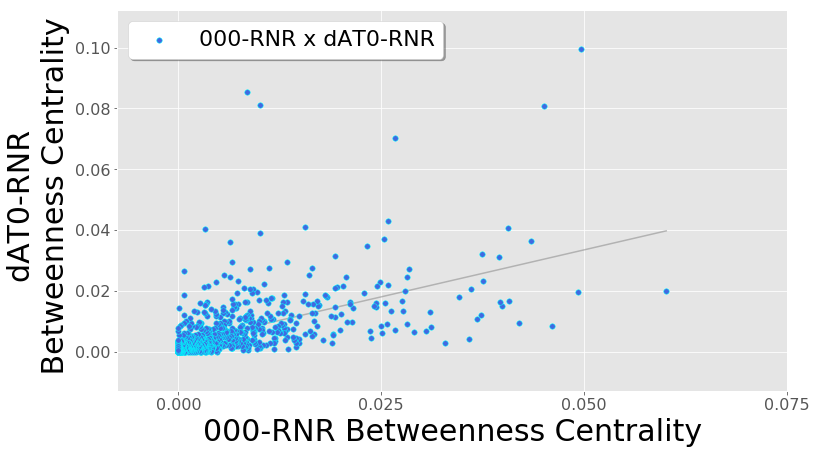

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(12,7))
df=pd.read_csv('scatter_betw_000_dAT02',sep='\t',header=None)
plt.scatter(df[1], df[2],color='royalblue',edgecolor='cyan',zorder=3,s=30,label="000-RNR x dAT0-RNR")

df.drop(df.tail(7).index,inplace=True)
plt.plot(np.unique(df[1]), np.poly1d(np.polyfit(df[1], df[2], 1))(np.unique(df[1])),alpha=0.5,color="gray")

# plt.axvline(df.iloc[120,1], color='r', linestyle='dashed', linewidth=2, label='cutoff')
plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=22)
plt.xlabel('000-RNR Betweenness Centrality',fontsize=30,color='black',labelpad=5)
plt.ylabel('dAT0-RNR \n Betweenness Centrality',fontsize=30,color='black',labelpad=5)
plt.xticks(np.arange(0.00, 0.0755, 0.025))
plt.yticks(np.arange(0.00, 0.12, 0.02))
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
# plt.text(0.015,0.05,'16%% cutoff=%.4f' %(df.iloc[120,1]),fontsize=16,color='k',bbox=dict(facecolor='w',edgecolor='none'))
plt.savefig('000-dAT0_Betweenness_scatterplot.png')
plt.show()

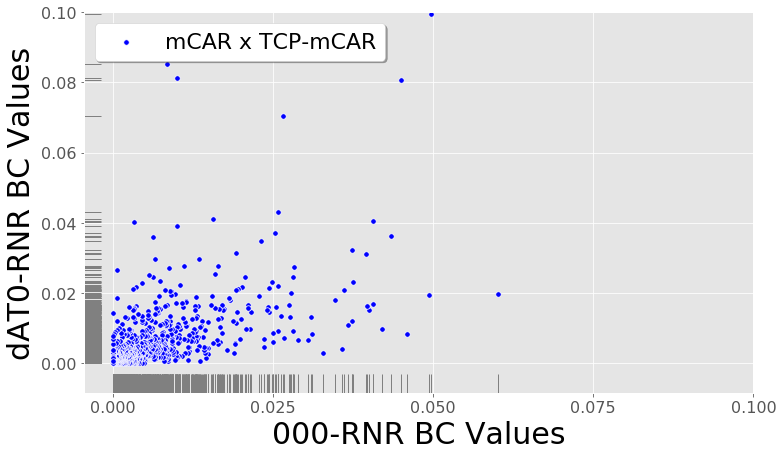

In [267]:
f, ax = plt.subplots(figsize=(12, 7))
df=pd.read_csv('scatter_betw_000_dAT02',sep='\t',header=None)

sns.scatterplot(df[1], df[2], ax=ax, color="blue",s=30,label="mCAR x TCP-mCAR")
sns.rugplot(df[1], color="gray", axis='x')
sns.rugplot(df[2], color="gray", axis='y', height=0.025);

plt.legend(shadow=True,facecolor='white',loc='upper left',fontsize=22)
plt.xlabel('000-RNR BC Values',fontsize=30,color='black',labelpad=5)
plt.ylabel('dAT0-RNR BC Values',fontsize=30,color='black',labelpad=5)


plt.xlim(-0.0045,0.1)
plt.ylim(-0.0085,0.1)
plt.xticks(np.arange(0.00, 0.11, 0.025))
plt.yticks(np.arange(0.00, 0.12, 0.02))
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

plt.savefig('RNR_Betweenness_scatterplot.png')
plt.show()

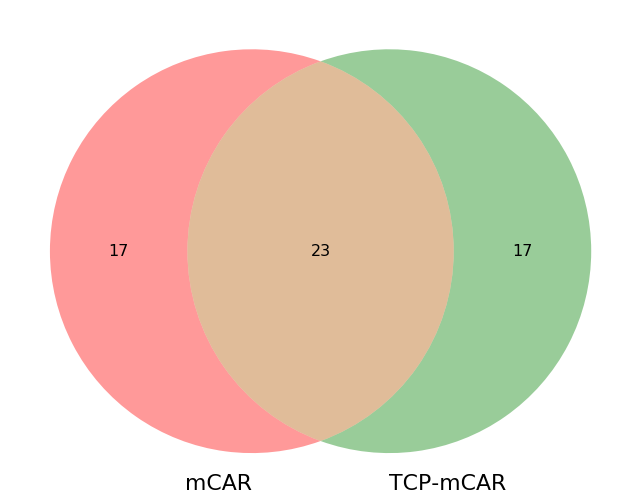

In [42]:
df1=pd.read_csv('scatter_betw_mCAR_mTCP',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:40][0]
B=df1.iloc[0:40][2]
out=venn2([set(A), set(B)],set_labels=('mCAR','TCP-mCAR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('CAR_Betw_intersections.png')
    
plt.show()

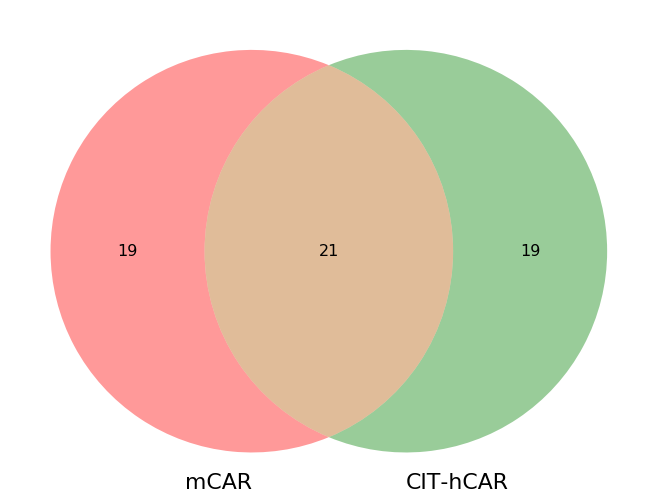

In [43]:
df1=pd.read_csv('scatter_betw_mCAR_hCIT',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:40][0]
B=df1.iloc[0:40][2]
out=venn2([set(A), set(B)],set_labels=('mCAR','CIT-hCAR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('mCAR-hCAR_Betw_intersections.png')
    
plt.show()

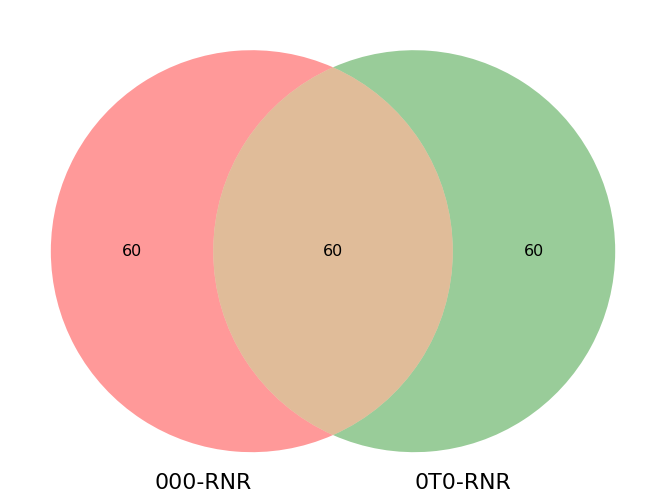

In [44]:
df1=pd.read_csv('scatter_betw_000_0T0',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:120][0]
B=df1.iloc[0:120][2]
out=venn2([set(A), set(B)],set_labels=('000-RNR','0T0-RNR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('000-0T0_Betw_intersections.png')
    
plt.show()

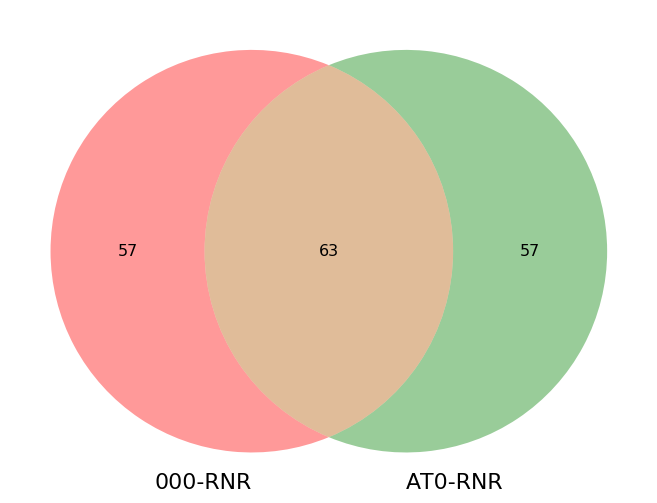

In [45]:
df1=pd.read_csv('scatter_betw_000_AT0',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:120][0]
B=df1.iloc[0:120][2]
out=venn2([set(A), set(B)],set_labels=('000-RNR','AT0-RNR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('000-AT0_Betw_intersections.png')
    
plt.show()

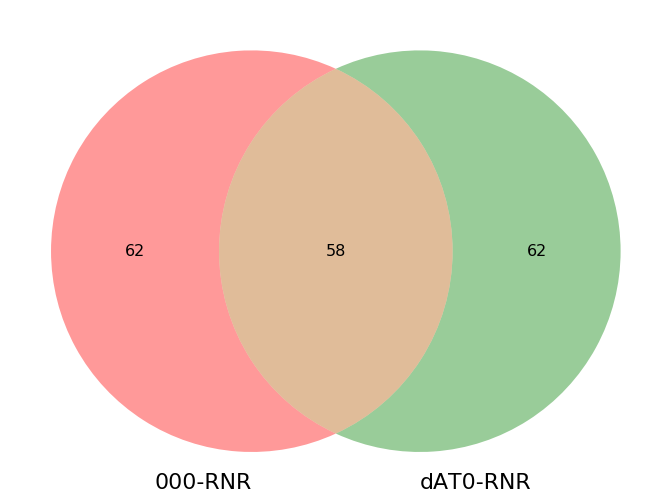

In [46]:
df1=pd.read_csv('scatter_betw_000_dAT0',sep='\t',header=None)
plt.figure(figsize=(12,9))
A=df1.iloc[0:120][0]
B=df1.iloc[0:120][2]
out=venn2([set(A), set(B)],set_labels=('000-RNR','dAT0-RNR'))
for text in out.set_labels:
    text.set_fontsize(22)
for text in out.subset_labels:
    text.set_fontsize(16)

plt.savefig('000-dAT0_Betw_intersections.png')
    
plt.show()

In [49]:
%%bash
head -n 40 scatter_betw_mCAR_mTCP  | awk '{print $1}' > temp
head -n 40 scatter_betw_mCAR_mTCP  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 40 scatter_betw_mCAR_mTCP  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection mCAR
head -n 40 scatter_betw_mCAR_mTCP  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection mTCP

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_mCAR-mTCP.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_mCAR-mTCP.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_mTCP-mCAR.cmd
rm tmp* temp*

In [50]:
%%bash
head -n 40 scatter_betw_mCAR_hCIT  | awk '{print $1}' > temp
head -n 40 scatter_betw_mCAR_hCIT  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 40 scatter_betw_mCAR_hCIT  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection mCAR
head -n 40 scatter_betw_mCAR_hCIT  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection hCIT

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_mCAR-hCIT.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_mCAR-hCIT.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_hCIT-mCAR.cmd
# rm tmp* temp*

In [51]:
%%bash
head -n 120 scatter_betw_000_0T0  | awk '{print $1}' > temp
head -n 120 scatter_betw_000_0T0  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 120 scatter_betw_000_0T0  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection 000
head -n 120 scatter_betw_000_0T0  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection 0T0

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_000_0T0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_000-0T0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_0T0-000.cmd
rm tmp* temp*

In [52]:
%%bash
head -n 120 scatter_betw_000_AT0  | awk '{print $1}' > temp
head -n 120 scatter_betw_000_AT0  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 120 scatter_betw_000_AT0  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection 000
head -n 120 scatter_betw_000_AT0  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection AT0

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_000-AT0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_000-AT0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_AT0-000.cmd
rm tmp* temp*

In [53]:
%%bash
head -n 120 scatter_betw_000_dAT0  | awk '{print $1}' > temp
head -n 120 scatter_betw_000_dAT0  | awk '{print $3}' >> temp
sort temp | uniq -d > temp2 #the intersection
sort temp | uniq -u > temp3 #total outside the intersection
cp temp2 tmp2
cp temp2 tmp3
head -n 120 scatter_betw_000_dAT0  | awk '{print $1}' >> tmp2
sort tmp2 | uniq -u > tmp && mv tmp tmp2 #outside the intersection 000
head -n 120 scatter_betw_000_dAT0  | awk '{print $3}' >> tmp3
sort tmp3 | uniq -u > tmp && mv tmp tmp3 #outside the intersection dAT0

awk '{gsub(/[^0-9.]/,"")}1' temp2 > tmp && mv tmp temp2
awk '{print "select"" "":"$1}' temp2 > join_000-dAT0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp2 > tmp && mv tmp tmp2
awk '{print "select"" "":"$1}' tmp2 > notjoin_000-dAT0.cmd
awk '{gsub(/[^0-9.]/,"")}1' tmp3 > tmp && mv tmp tmp3
awk '{print "select"" "":"$1}' tmp3 > notjoin_dAT0-000.cmd
rm tmp* temp*

# Closeness Assignment Files

In [39]:
%%bash


cut -f 3 -d$'\t' mCAR_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' mCAR_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > mCAR_close.asn

cut -f 3 -d$'\t' mTCP_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' mTCP_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > mTCP_close.asn 

cut -f 3 -d$'\t' hCAR_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' hCAR_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > hCAR_close.asn 

cut -f 3 -d$'\t' 000_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' 000_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > 000_close.asn 

cut -f 3 -d$'\t' 0T0_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' 0T0_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > 0T0_close.asn 

cut -f 3 -d$'\t' AT0_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' AT0_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > AT0_close.asn 

cut -f 3 -d$'\t' dAT0_close | awk '{gsub(/[^0-9. ]/,"")}1' > temp
cut -f 2 -d$'\t' dAT0_close > temp2
paste -d' ' <(awk '{print " "$1}' temp ) <(awk '{print "\t"$1}' temp2 ) |sed 's/ //g' | sort -k1 -n | awk '{print "\t"":"$1"\t"$2}' > dAT0_close.asn 
